In [124]:
# VISUALIZING TEXT DATA
# Visualizing the dependency parse
import spacy
from spacy import displacy
from pathlib import Path

nlp = spacy.load('en_core_web_sm')

def visualize(doc, is_list=False, compact=True):
    options = {
        "add_lemma": True,
        "compact": compact,
        "color": "blue",  # Colour is changed to blue for better differentiation of nodes
        "collapse_punct": False,  # Punctuation is not collapsed for legal text clarity
        "arrow_spacing": 15,  # Arrow spacing is reduced for dense text
        "bg": "#F0F8FF",  # Background is changed to a softer color
        "font": "Arial",  # Font is updated for better readability
        "distance": 140  # Distance is increased to accommodate longer sentences
    }

    if is_list:
        displacy.render(list(doc.sents), style='dep', options=options, jupyter=True)
    else:
        displacy.render(doc, style='dep', options=options, jupyter=True)

def save_dependency_parse(doc, path, compact=True):
    options = {
        "add_lemma": True,
        "compact": compact,
        "color": "blue",  
        "collapse_punct": False,
        "arrow_spacing": 15,
        "bg": "#F0F8FF",
        "font": "Arial",
        "distance": 140
    }
    output_path = Path(path)
    svg = displacy.render(doc, style="dep", options=options, jupyter=False)
    output_path.open("w", encoding="utf-8").write(svg)

# Legal text example is used
legal_text = (
    "Pursuant to Regulation 81(4)(a) of the Regulations, the Chamber orders the LRVs, "
    "as OPCV counsel, to provide general support and assistance to any potential beneficiary "
    "during the administrative eligibility assessment and the urgency screening, particularly "
    "to those assessed as non-eligible or that do not qualify for assistance pursuant to the IDIP. (para. 41)."
)
doc_legal = nlp(legal_text)

visualize(doc_legal, compact=False)

save_dependency_parse(doc_legal, "/Users/dariamartinovskaya/Downloads/PLN/Chapter08/LegalText_Dependency.svg", compact=False)

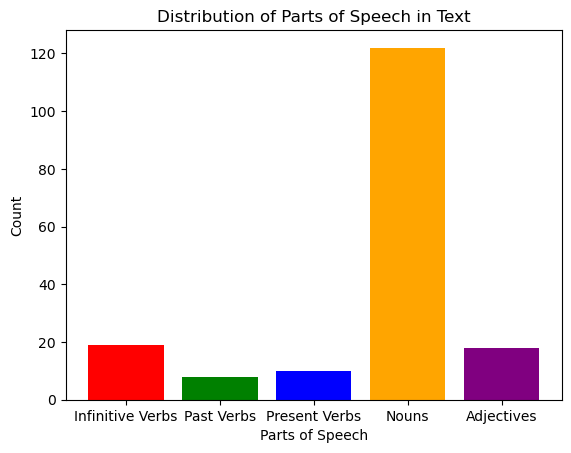

In [130]:
#Visualizing parts of speech 
import spacy
import matplotlib.pyplot as plt

# Loading a more accurate model
nlp = spacy.load("en_core_web_md")  # Using a medium-sized model

# Replacing verbs with nouns and adjectives for analysis
past_tags = ["VBD", "VBN"]
present_tags = ["VBG", "VBP", "VBZ"]
noun_tags = ["NN", "NNS", "NNP", "NNPS"]  # Adding nouns
adj_tags = ["JJ", "JJR", "JJS"]  # Adding adjectives

# Text is sent directly instead of loading from the file
text = """
Article 1
Adoption of the Code
1. This Code has been adopted by the judges pursuant to regulation 126 and shall be read subject to the Statute, the Rules and the Regulations of the Court.
2. The Code shall be reviewed regularly and amended, as necessary.
Article 2 Use of terms
In this Code of Judicial Ethics the terms “Court”, “Statute”, “Rules” and “Regulations” shall have the meaning attached to them in the Regulations of the Court.
Article 3
Judicial independence
1. Judges shall uphold the independence of their office and the authority of the Court and shall conduct themselves accordingly in carrying out their judicial functions.
2. Judges shall decide matters before them on the basis of facts and in accordance with the law, without regard to any restrictions, improper influences, inducements, pressures, threats or interferences, direct or indirect, from any quarter or for any reason.
3. Judges shall not engage in any activity which is likely to interfere with their judicial functions or to affect confidence in their independence.
Article 4 Impartiality
1. Judges shall be impartial and ensure the appearance of impartiality in the discharge of their judicial functions.
2. Judges shall avoid any conflict of interest, or being placed in a situation which might reasonably be perceived as giving rise to a conflict of interest.
Article 5 Integrity
1. Judges shall conduct themselves with probity, restraint and integrity in accordance with their office, thereby enhancing public confidence in the judiciary. In interactions with States Parties, civil society, the diplomatic community and other stakeholders, judges will act with care and consideration to ensure the propriety of their communications in such context.
2. Judges shall treat fellow judges, Parties and participants, staff members and others with dignity and respect. Judges shall not engage in any form of discrimination, harassment, including sexual harassment, and abuse of authority. The Court’s Administrative Instruction on Investigations of Unsatisfactory Conduct and the Administrative Instruction on Addressing Discrimination, Harassment, Including Sexual Harassment, and Abuse of Authority, shall apply mutatis mutandis to the judges.
"""

def visualize_parts_of_speech(text_file):
    doc = nlp(text)
    
    # New dictionary for counting nouns, adjectives, and verbs
    pos_dict = {"Infinitive Verbs": 0, "Past Verbs": 0, "Present Verbs": 0, "Nouns": 0, "Adjectives": 0}
    
    # Counting parts of speech in the text
    for token in doc:
        if token.tag_ == "VB":  
            pos_dict["Infinitive Verbs"] += 1
        if token.tag_ in past_tags:
            pos_dict["Past Verbs"] += 1
        if token.tag_ in present_tags:
            pos_dict["Present Verbs"] += 1
        if token.tag_ in noun_tags:
            pos_dict["Nouns"] += 1
        if token.tag_ in adj_tags:
            pos_dict["Adjectives"] += 1
    
    # Plotting the graph with the new data
    plt.bar(range(len(pos_dict)),
            list(pos_dict.values()),
            align='center', color=["red", "green", "blue", "orange", "purple"])
    plt.xticks(range(len(pos_dict)),
               list(pos_dict.keys()))
    plt.xlabel('Parts of Speech')
    plt.ylabel('Count')
    plt.title('Distribution of Parts of Speech in Text')
    plt.show()

visualize_parts_of_speech(text)

In [143]:
import spacy
from spacy import displacy
import re

nlp = spacy.load('en_core_web_md') 

# Custom function is added to detect legal terms like "Section", "Article", or "Court"
def custom_legal_ner(text):
    legal_terms = re.findall(r'\b(Section|Article|Court|Judgment|Clause|Privilege|Confidentiality)\b', text)
    doc = nlp(text)

    # Custom legal entities are added
    new_ents = []
    for term in legal_terms:
        start = text.find(term)
        end = start + len(term)
        span = doc.char_span(start, end, label="LEGAL_TERM")
        if span:
            if not any(span.start <= existing_ent.end and span.end >= existing_ent.start for existing_ent in doc.ents):
                new_ents.append(span)
    
    doc.ents = list(doc.ents) + new_ents
    
    return doc

def visualize_legal_terms(doc):
    # Colors for legal-specific entities are defined
    colors = {"ORG": "green", "PERSON": "yellow", "GPE": "blue", 
              "LEGAL_TERM": "purple", "DATE": "orange", "MONEY": "red"}
    options = {"colors": colors, "compact": True, "bg": "#fafafa"}
    displacy.render(doc, style='ent', options=options, jupyter=True)

def visualize_legal_text(text):
    doc = custom_legal_ner(text)
    visualize_legal_terms(doc)

# Legal text is added
text = """
Section 7. Confidentiality
32. Members of the Office shall uphold the highest standard of confidentiality in the discharge of their duties, respect and actively exercise all care to ensure respect for the confidentiality of information.
33. Members of the Office shall not disclose any privileged material or any material deemed confidential by the Court, unless authorised to do so.
34. In addition, Staff members who accidentally encounter confidential material or information shall immediately take all measures necessary to avoid or minimise a possible negative impact on the operations of the Office and the Court and notify their superiors. Judges shall treat fellow judges, Parties and participants, staff members and others with dignity and respect. Judges shall not engage in any form of discrimination, harassment, including sexual harassment, and abuse of authority. The Court’s Administrative Instruction on Investigations of Unsatisfactory Conduct and the Administrative Instruction on Addressing Discrimination, Harassment, Including Sexual Harassment, and Abuse of Authority, shall apply mutatis mutandis to the judges.
"""

visualize_legal_text(text)

def save_ent_html(doc, path):
    html = displacy.render(doc, style="ent", jupyter=False)
    with open(path, "w", encoding="utf-8") as html_file:
        html_file.write(html)
    html_file.close()

save_ent_html(doc, "/Users/dariamartinovskaya/Downloads/PLN/Chapter08/legal_ner_vis.html")